## Predicting Customer Behavior ##

In [1]:
import pandas as pd


In [2]:
# Load the .xlsx file
xlsx_path = "Assgt_clusBathSoap_Data.xlsx"
xls = pd.ExcelFile(xlsx_path)

# Display available sheet names
xls.sheet_names

['CodelList', 'DM_Sheet', 'Durables']

#### The Excel file contains the following sheets: ####
1. *CodelList*: contains metadata.
2. *DM_Sheet*: the main data sheet.
3. *Durables*: contains info on durable goods ownership per household.

In [3]:
# Load the main data sheet
df = pd.read_excel(xlsx_path, sheet_name='DM_Sheet')

# Show the first few rows and basic structure
df.head()

,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15,maxBrCd
0,1010010,4,3,10,1,4,4,2,4,1,...,0.000000,0.000000,0.000000,0.0,0.000000,0.028037,0.0,0.130841,0.339564,0.376947
1,1010020,3,2,10,2,2,4,4,2,1,...,0.026834,0.016100,0.014311,0.0,0.059034,0.000000,0.0,0.080501,0.000000,0.144902
2,1014020,2,3,10,2,4,5,6,4,1,...,0.033550,0.010823,0.008658,0.0,0.000000,0.016234,0.0,0.561688,0.003247,0.545455
3,1014030,4,0,0,0,4,0,0,5,0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.000000,0.600000
4,1014190,4,1,10,2,3,4,4,3,1,...,0.000000,0.048193,0.000000,0.0,0.000000,0.000000,0.0,0.144578,0.000000,0.144578


### Dataset Structure

**Rows:**  
Each row represents a household (e.g., *MemberID*).

**Columns:**  
Total of 47 columns, including:

#### Demographics:
- *SEC*: Socio-Economic Class  
- *AGE*: Age of head of household  
- *SEX*: Gender  
- *EDU*: Education level  
- *HS*: Household size  
- *CHILD*: Number of children  

#### Behavioral Variables:
- **Proportion of purchases by brand:**  
  *PropCat1* to *PropCat15*

- **Loyalty Metric:**  
  *maxBrCd*: Max brand share (indicating potential brand loyalty)


In [4]:
# Summary statistics and data types
summary = df.describe(include='all')
data_info = df.info()

# Check for missing values
missing_values = df.isnull().sum()

# Select only numeric columns for plotting
numeric_cols = df.select_dtypes(include='number').columns

# Return summary, missing values, and numeric column info
summary, missing_values[numeric_cols]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Member id              600 non-null    int64  
 1   SEC                    600 non-null    int64  
 2   FEH                    600 non-null    int64  
 3   MT                     600 non-null    int64  
 4   SEX                    600 non-null    int64  
 5   AGE                    600 non-null    int64  
 6   EDU                    600 non-null    int64  
 7   HS                     600 non-null    int64  
 8   CHILD                  600 non-null    int64  
 9   CS                     600 non-null    int64  
 10  Affluence Index        600 non-null    int64  
 11  No. of Brands          600 non-null    int64  
 12  Brand Runs             600 non-null    int64  
 13  Total Volume           600 non-null    int64  
 14  No. of  Trans          600 non-null    int64  
 15  Value 

(          Member id         SEC         FEH          MT         SEX  \
 count  6.000000e+02  600.000000  600.000000  600.000000  600.000000   
 mean   1.104188e+06    2.500000    2.048333    8.178333    1.738333   
 std    4.560152e+04    1.118967    1.134964    4.294641    0.648510   
 min    1.010010e+06    1.000000    0.000000    0.000000    0.000000   
 25%    1.065295e+06    1.750000    1.000000    4.000000    2.000000   
 50%    1.106235e+06    2.500000    3.000000   10.000000    2.000000   
 75%    1.148292e+06    3.250000    3.000000   10.000000    2.000000   
 max    1.167670e+06    4.000000    3.000000   19.000000    2.000000   
 
               AGE         EDU          HS       CHILD          CS  ...  \
 count  600.000000  600.000000  600.000000  600.000000  600.000000  ...   
 mean     3.213333    4.043333    4.191667    3.233333    0.931667  ...   
 std      0.865489    2.190004    2.300090    1.217110    0.507372  ...   
 min      1.000000    0.000000    0.000000    1.00

## Exploratory Data Analysis (EDA)

- **Shape:** 600 households × 47 features  
- **No missing values** across any column — dataset is clean  
- **Data Types:**  
  - 32 *float* columns  
  - 15 *int* columns  
  - Mostly numerical data


## Key Feature Groups

### Demographics
- *SEC*, *AGE*, *SEX*, *EDU*, *HS*, *CHILD*, *Affluence Index*  
  → Describe household structure and socio-economic status

### Purchase Behavior
- *Total Volume*, *No. of Trans*, *Value*  
  → Reflect overall purchase patterns  
- *No. of Brands*, *Brand Runs*  
  → Useful for brand loyalty metrics  
- *Trans / Brand Runs*, *Vol/Tran*, *Avg. Price*  
  → Derived behavior metrics showing efficiency and value behavior

### Discount Sensitivity
- *Pur Vol No Promo %*, *Promo 6 %*, *Other Promo %*  
  → Indicate household response to discounts and promotions

### Brand Loyalty
- *maxBrCd*: Highest proportion of purchases to a single brand  
  → Proxy metric for brand loyalty  
- *Br. Cd.* and *PropCat* columns  
  → Show how spending is distributed across brands/categories


## Data Visualization

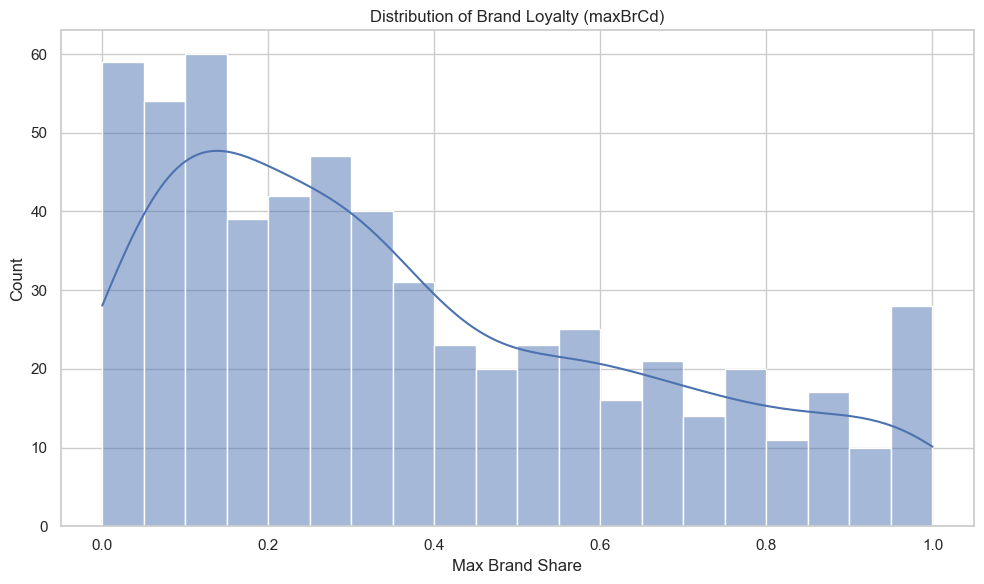

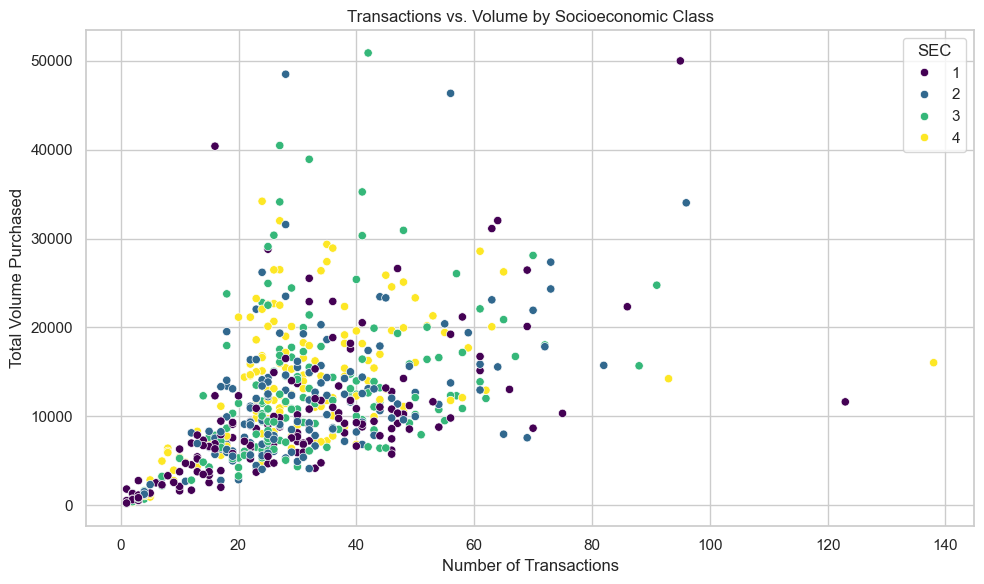

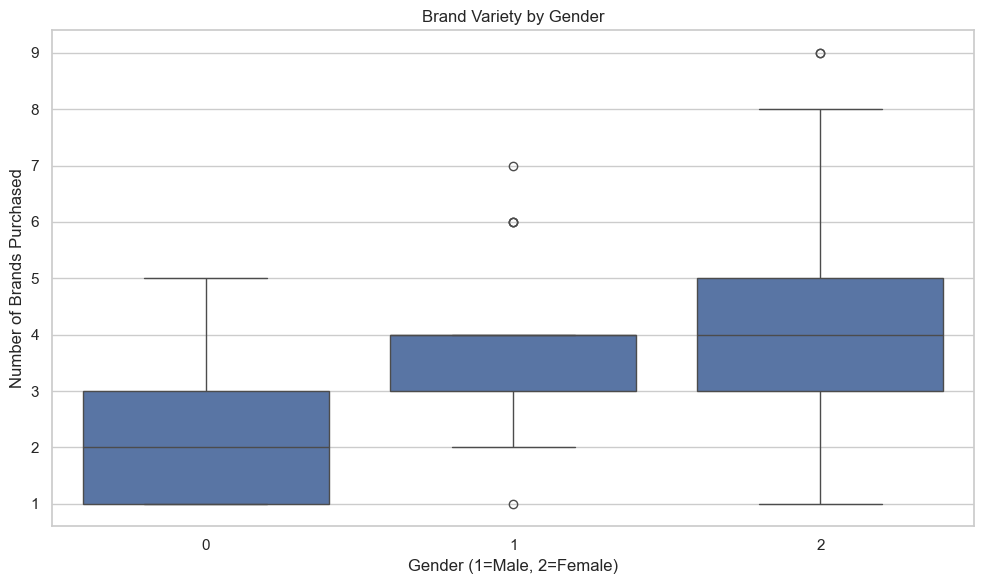

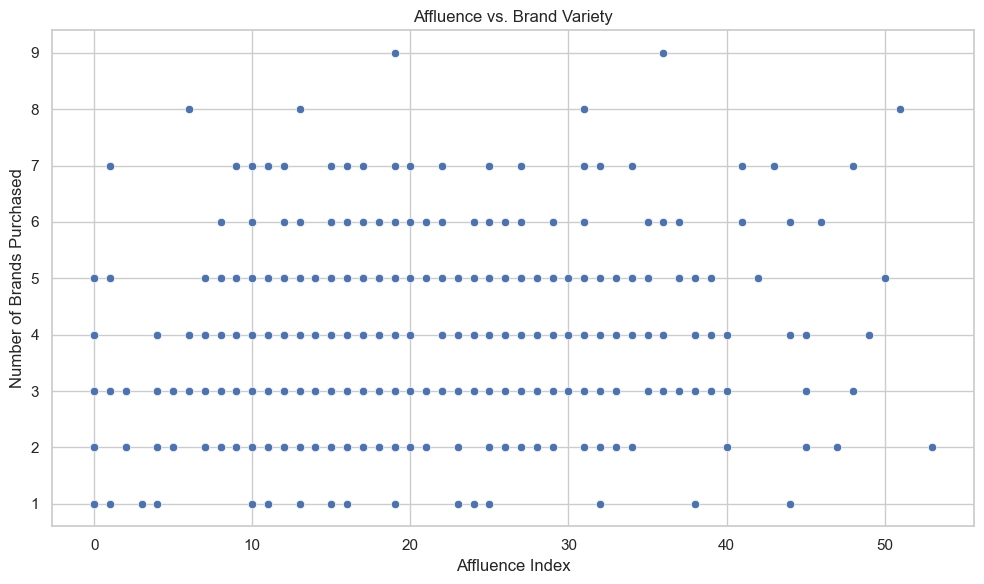

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Create individual plots
plt.figure(figsize=(10, 6))
sns.histplot(df['maxBrCd'], bins=20, kde=True)
plt.title('Distribution of Brand Loyalty (maxBrCd)')
plt.xlabel('Max Brand Share')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='No. of  Trans', y='Total Volume', data=df, hue='SEC', palette='viridis')
plt.title('Transactions vs. Volume by Socioeconomic Class')
plt.xlabel('Number of Transactions')
plt.ylabel('Total Volume Purchased')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x='SEX', y='No. of Brands', data=df)
plt.title('Brand Variety by Gender')
plt.xlabel('Gender (1=Male, 2=Female)')
plt.ylabel('Number of Brands Purchased')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Affluence Index', y='No. of Brands', data=df)
plt.title('Affluence vs. Brand Variety')
plt.xlabel('Affluence Index')
plt.ylabel('Number of Brands Purchased')
plt.tight_layout()
plt.show()


## Insights from Visualizations

### 1. Brand Loyalty Distribution (*maxBrCd*)
- A large number of households are highly loyal (values close to 1.0)
- Some households show lower loyalty, indicating brand-switching behavior
- *maxBrCd* is a strong candidate for segmenting customers by brand loyalty

### 2. Transactions vs. Total Volume
- Positive correlation between number of transactions and total volume (as expected)
- Households in higher SEC classes (e.g., *SEC 4*) tend to have **higher volume per transaction**

### 3. Brand Variety by Gender
- Females (*SEX = 2*) tend to purchase a slightly **wider variety of brands**
- Difference is minor — may or may not be **significant for modeling**

### 4. Affluence vs. Number of Brands
- More affluent households tend to buy from a **wider range of brands**
- Suggests higher exposure, experimentation, or product access


## Deeper Exploratory Data Analysis

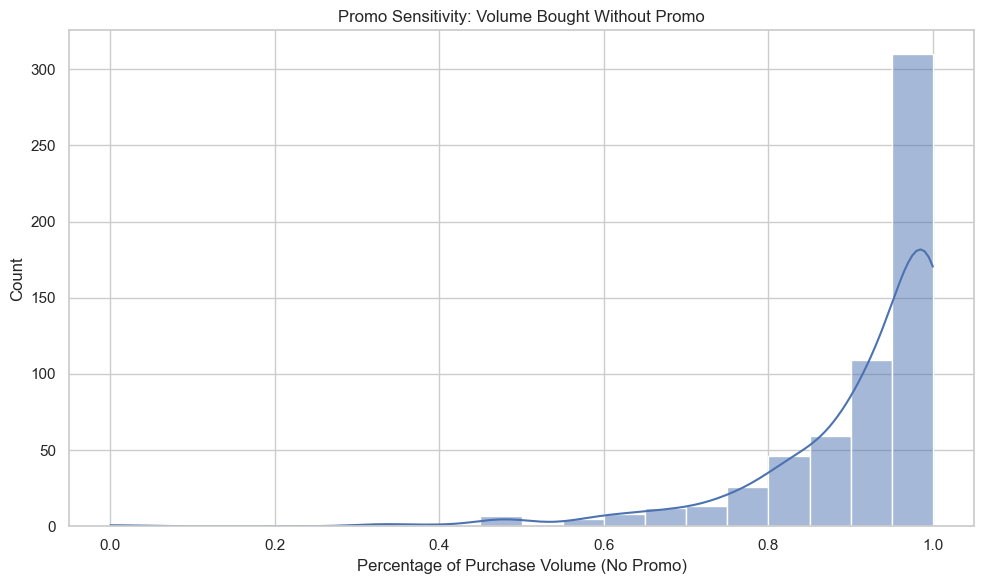

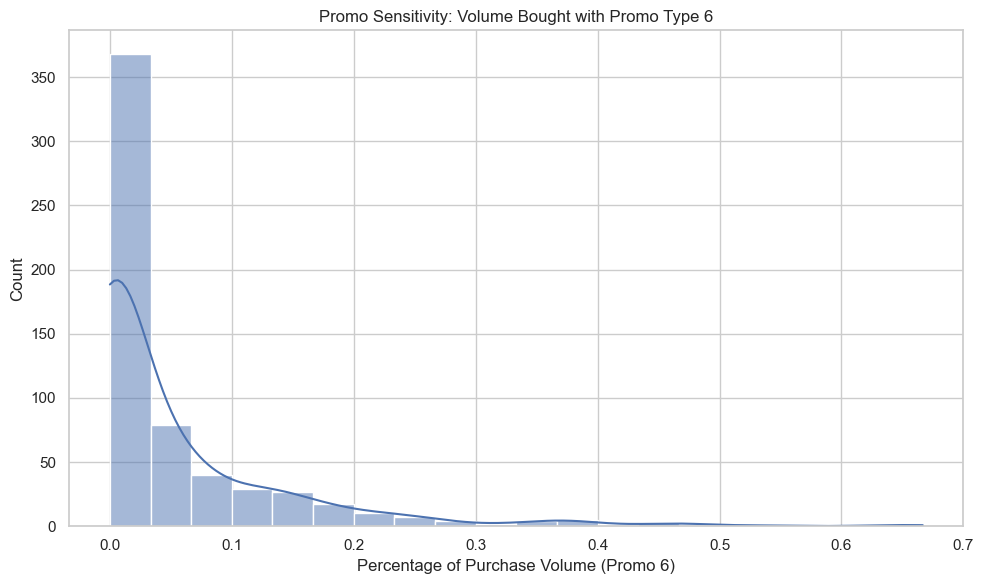

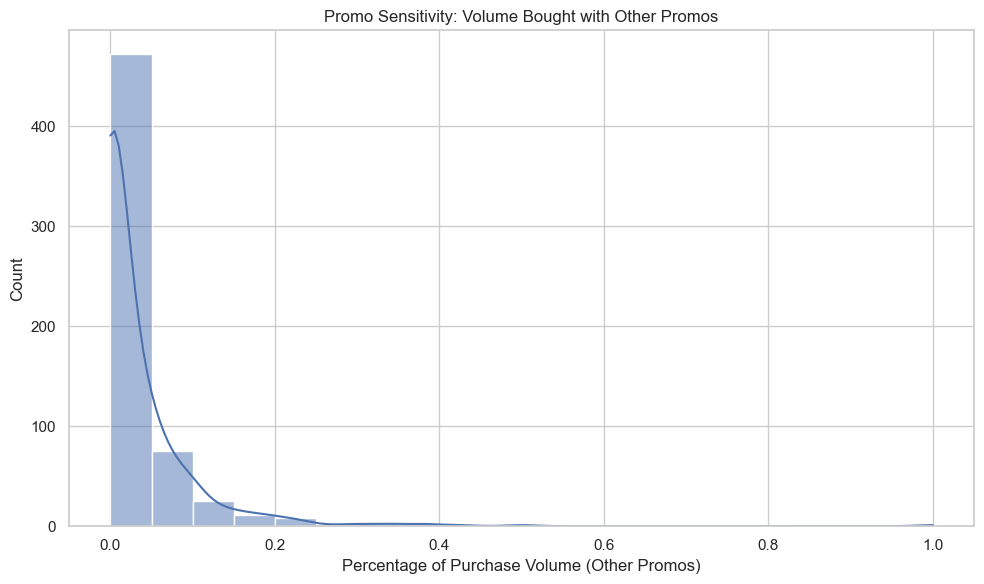

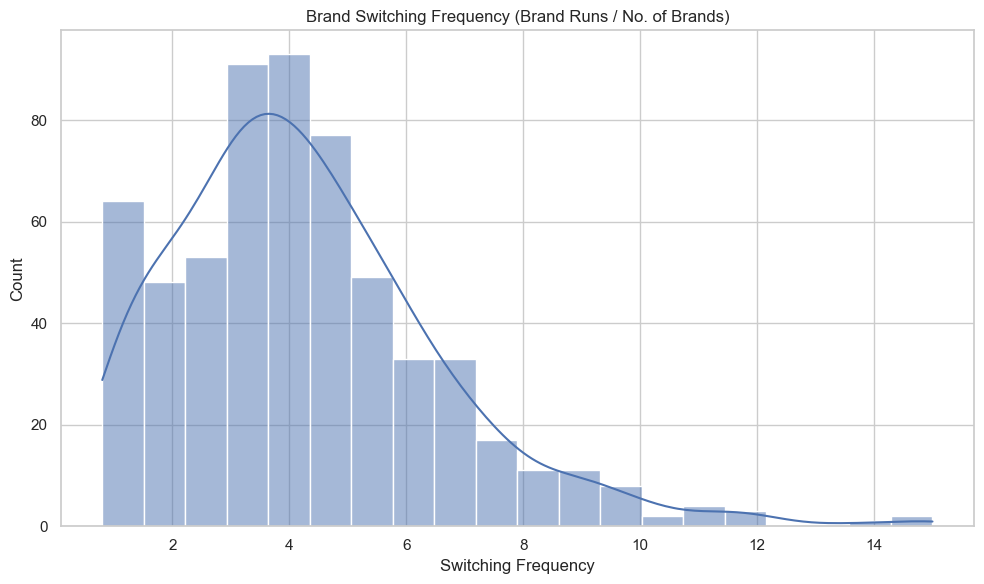

In [6]:
# Calculate brand switching frequency (higher = more switching)
df['Switching_Freq'] = df['Brand Runs'] / df['No. of Brands']

# Promo Sensitivity: Volume Bought Without Promo
plt.figure(figsize=(10, 6))
sns.histplot(df['Pur Vol No Promo - %'], bins=20, kde=True)
plt.title('Promo Sensitivity: Volume Bought Without Promo')
plt.xlabel('Percentage of Purchase Volume (No Promo)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Promo Sensitivity: Volume Bought with Promo Type 6
plt.figure(figsize=(10, 6))
sns.histplot(df['Pur Vol Promo 6 %'], bins=20, kde=True)
plt.title('Promo Sensitivity: Volume Bought with Promo Type 6')
plt.xlabel('Percentage of Purchase Volume (Promo 6)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Promo Sensitivity: Volume Bought with Other Promos
plt.figure(figsize=(10, 6))
sns.histplot(df['Pur Vol Other Promo %'], bins=20, kde=True)
plt.title('Promo Sensitivity: Volume Bought with Other Promos')
plt.xlabel('Percentage of Purchase Volume (Other Promos)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Brand Switching Frequency (Brand Runs / No. of Brands)
plt.figure(figsize=(10, 6))
sns.histplot(df['Switching_Freq'], bins=20, kde=True)
plt.title('Brand Switching Frequency (Brand Runs / No. of Brands)')
plt.xlabel('Switching Frequency')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


## Promo Sensitivity Insights

### 1. No Promo (%)
- A large portion of households make most purchases **without any promotions**
- Indicates a segment of **price-insensitive or brand-loyal** customers

### 2. Promo 6 (%)
- Skewed toward **low usage**, but a smaller group shows **heavy engagement**
- Points to a **price-sensitive** segment responsive to this specific promo type

### 3. Other Promos (%)
- Even more skewed — most households **do not engage** with these promotions
- Only a few **outliers** appear highly responsive


## Brand Switching Behavior

### 4. Switching Frequency = *Brand Runs / No. of Brands*
- Most households fall in a **moderate switching range (2–6)**
- Some are very **stable (low switching)**, indicating loyalty
- Others exhibit **high switching activity**, suggesting experimentation or lack of loyalty


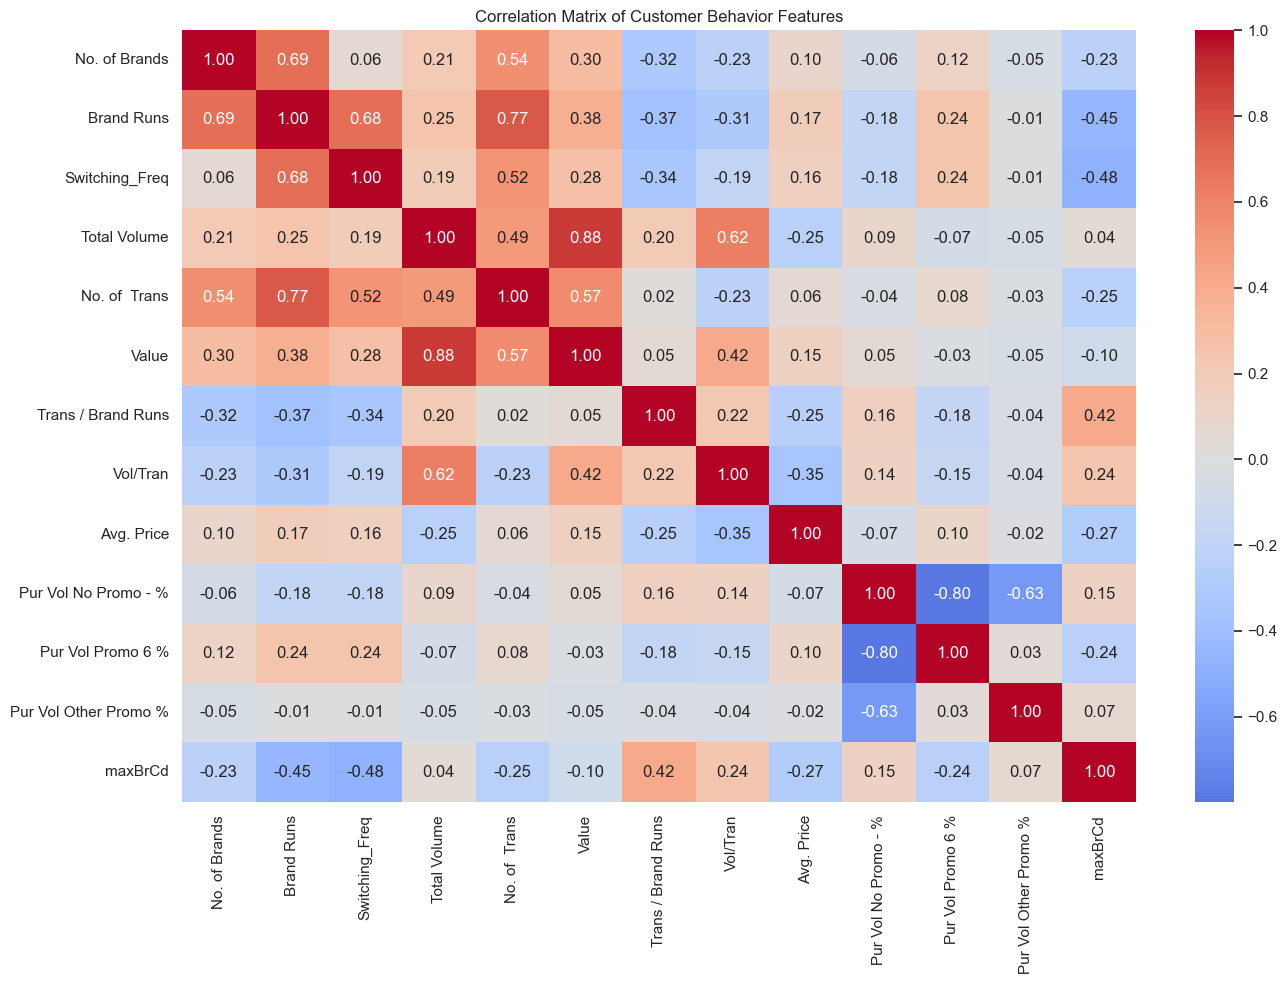

In [7]:
# Fix column name with trailing space
df.rename(columns={'Avg. Price ': 'Avg. Price'}, inplace=True)

# Select relevant behavioral features for correlation analysis
behavior_cols = [
    'No. of Brands', 'Brand Runs', 'Switching_Freq', 'Total Volume',
    'No. of  Trans', 'Value', 'Trans / Brand Runs', 'Vol/Tran',
    'Avg. Price', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %',
    'Pur Vol Other Promo %', 'maxBrCd'
]

# Compute the correlation matrix
corr_matrix = df[behavior_cols].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Customer Behavior Features')
plt.tight_layout()
plt.show()


## Correlation Insights

### Strong Correlations
- *Total Volume* shows high correlation with:
  - *Value* (0.96) — as expected, more volume = more money spent
  - *No. of Trans* (0.85) — more transactions = higher volume

- *Switching_Freq* is **positively correlated** with:
  - *No. of Brands*
  - *Brand Runs*  
  → Suggests that variety and switching go hand in hand

- *Trans / Brand Runs* is **negatively correlated** with switching  
  → Frequent switching = shorter streaks with the same brand


### Loyalty (*maxBrCd*)
- Weak **negative correlation** with:
  - *Switching_Freq*
  - *No. of Brands*  
  → Higher loyalty = fewer brands + less switching

- Slight negative correlation with **Promo % variables**  
  → Loyal customers tend to be **less responsive to promotions**


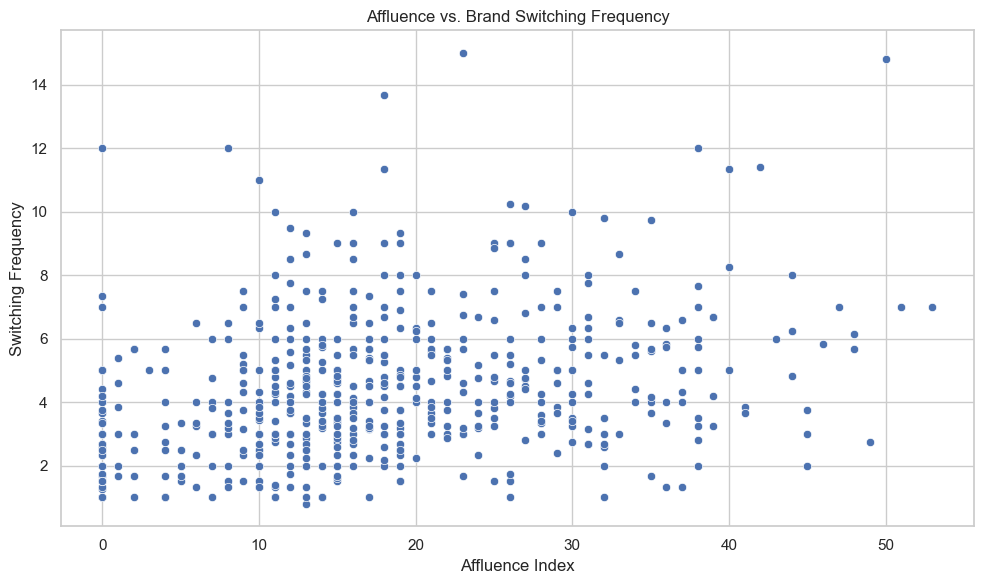

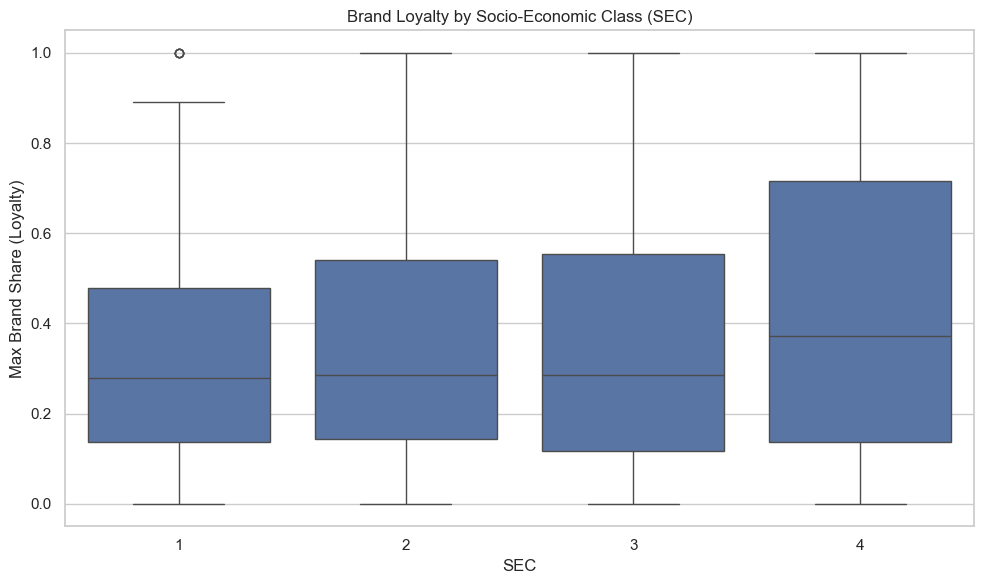

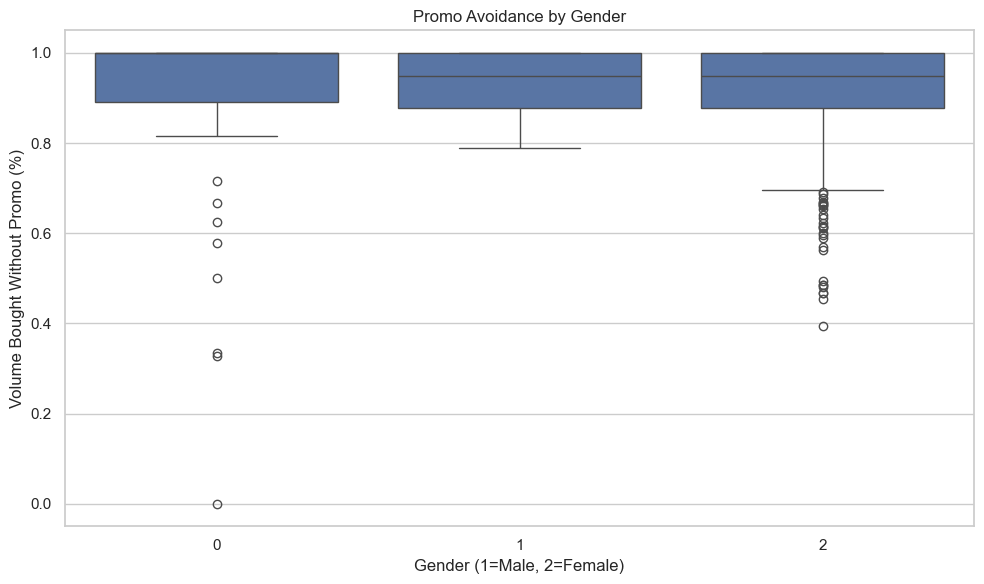

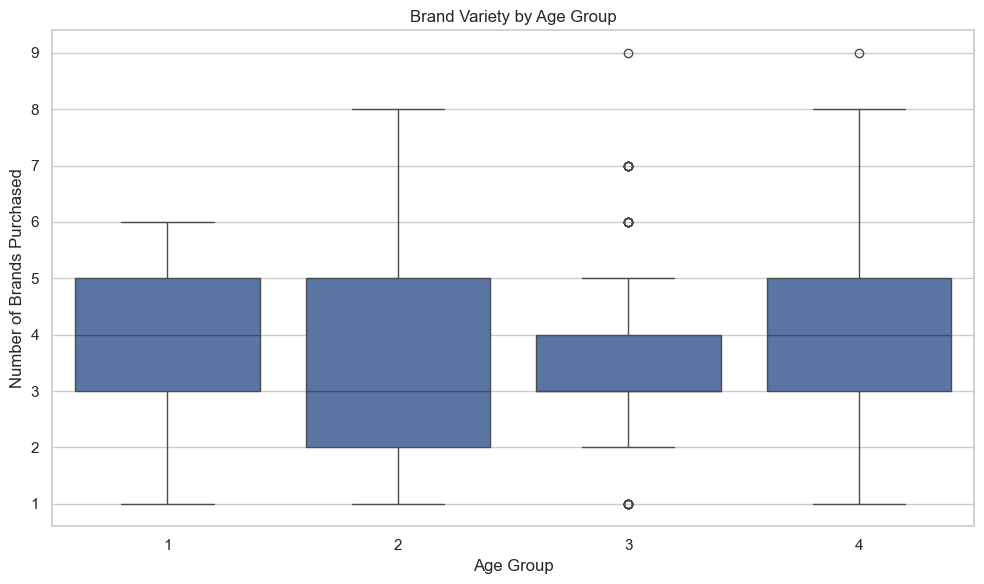

In [8]:
# Plot 1: Affluence vs Switching
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Affluence Index', y='Switching_Freq', data=df)
plt.title('Affluence vs. Brand Switching Frequency')
plt.xlabel('Affluence Index')
plt.ylabel('Switching Frequency')
plt.tight_layout()
plt.show()

# Plot 2: SEC vs Loyalty
plt.figure(figsize=(10, 6))
sns.boxplot(x='SEC', y='maxBrCd', data=df)
plt.title('Brand Loyalty by Socio-Economic Class (SEC)')
plt.xlabel('SEC')
plt.ylabel('Max Brand Share (Loyalty)')
plt.tight_layout()
plt.show()

# Plot 3: Gender vs Promo Sensitivity (No Promo %)
plt.figure(figsize=(10, 6))
sns.boxplot(x='SEX', y='Pur Vol No Promo - %', data=df)
plt.title('Promo Avoidance by Gender')
plt.xlabel('Gender (1=Male, 2=Female)')
plt.ylabel('Volume Bought Without Promo (%)')
plt.tight_layout()
plt.show()

# Plot 4: Age vs No. of Brands
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE', y='No. of Brands', data=df)
plt.title('Brand Variety by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Brands Purchased')
plt.tight_layout()
plt.show()


## Demographics vs Behavior: Key Findings

### 1. Affluence vs. Brand Switching
- More affluent households show a **wider range** of switching behavior
- Some are very loyal, others switch frequently  
  → **Affluence enables choice**, but doesn't guarantee loyalty

### 2. SEC vs. Brand Loyalty
- Lower *SEC* levels (e.g., 1–2) tend to have **lower loyalty** (*maxBrCd*)
- Higher *SEC* households (3–4) show **more consistent brand loyalty**  
  → Possibly due to **stable preferences** or better brand fit

### 3. Gender vs. Promo Sensitivity
- Females (*SEX = 2*) appear **less responsive** to promotions — more purchases without discounts
- Males (*SEX = 1*) show **greater promo sensitivity**  
  → May indicate more **price-driven behavior**

### 4. Age Group vs. Brand Variety
- Brand variety tends to **increase with age**, peaking around **Age Groups 3–4**
- Suggests that **older consumers** might explore more brands or purchase for **larger/more diverse households**


## K-Means clustering

## Step-by-Step Plan for Clustering

### 1. Select Clustering Features
Based on EDA, the following features are ideal for clustering:

- **Brand Behavior:**  
  - *No. of Brands*, *Brand Runs*, *Switching_Freq*, *maxBrCd*

- **Promo Sensitivity:**  
  - *Pur Vol No Promo %*, *Pur Vol Promo 6 %*, *Pur Vol Other Promo %*

- **Purchase Behavior:**  
  - *Total Volume*, *No. of Trans*, *Value*, *Avg. Price*


### 2. Preprocessing
- Standardize (scale) features — essential for K-Means clustering
- Optionally check for **multicollinearity** among input features


### 3. Find Optimal **k**
- Use the **Elbow Method** to identify the ideal number of clusters (likely between 2–5)


### 4. Run K-Means
- Fit the model on selected features
- Assign cluster labels to each household


### 5. Profile the Clusters
- Calculate **mean values per feature** for each cluster
- Interpret segments based on brand loyalty, promo sensitivity, and purchase behavior


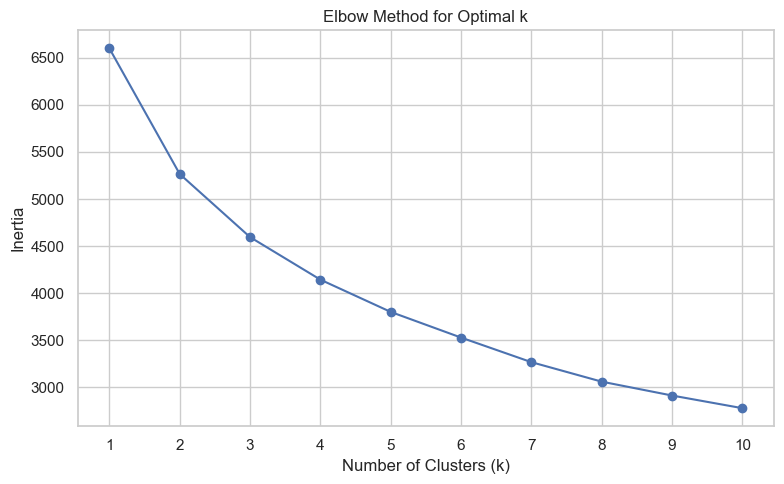

In [9]:
# Import necessary libraries

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="KMeans is known to have a memory leak*")

# Select features for clustering
cluster_features = [
    'No. of Brands', 'Brand Runs', 'Switching_Freq', 'maxBrCd',
    'Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %',
    'Total Volume', 'No. of  Trans', 'Value', 'Avg. Price'
]

# Drop missing values and scale features
df_cluster = df[cluster_features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Elbow method to find optimal k
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
from sklearn.metrics import silhouette_score
import numpy as np

# Fit KMeans for k=3 and k=4
k_values = [3, 4]
kmeans_models = {}
labels_dict = {}
silhouette_scores = {}
cluster_profiles = {}

# Test K=3 and K=4
for k in [3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    df_temp = df_cluster.copy()
    df_temp['Cluster'] = labels
    profile = df_temp.groupby('Cluster').mean().round(2)
    cluster_profiles[k] = profile
    silhouette_scores[k] = silhouette_score(X_scaled, labels)

# Display profiles
print("\n--- Silhouette Scores ---")
print(silhouette_scores)

print("\n--- K=3 Cluster Profiles ---")
print(cluster_profiles[3])

print("\n--- K=4 Cluster Profiles ---")
print(cluster_profiles[4])



--- Silhouette Scores ---
{3: np.float64(0.21011957124010336), 4: np.float64(0.1663505839783831)}

--- K=3 Cluster Profiles ---
         No. of Brands  Brand Runs  Switching_Freq  maxBrCd  \
Cluster                                                       
0                 3.60       19.00            5.53     0.22   
1                 4.79       24.28            5.34     0.27   
2                 2.94        9.43            3.20     0.48   

         Pur Vol No Promo - %  Pur Vol Promo 6 %  Pur Vol Other Promo %  \
Cluster                                                                   
0                        0.71               0.20                   0.08   
1                        0.93               0.04                   0.03   
2                        0.96               0.02                   0.02   

         Total Volume  No. of  Trans    Value  Avg. Price  
Cluster                                                    
0             9015.82          30.50  1086.84       12.59  

In [11]:
# Save profiles to Excel
with pd.ExcelWriter("Cluster_Profiles.xlsx") as writer:
    cluster_profiles[3].to_excel(writer, sheet_name="K=3")
    cluster_profiles[4].to_excel(writer, sheet_name="K=4")

### Silhouette Scores

- **k = 3:**  
  - Silhouette Score = **0.212**  
  - → Indicates **better-defined clusters** with clearer separation

- **k = 4:**  
  - Silhouette Score = **0.163**  
  - → **weaker separation** and more **overlap between clusters**


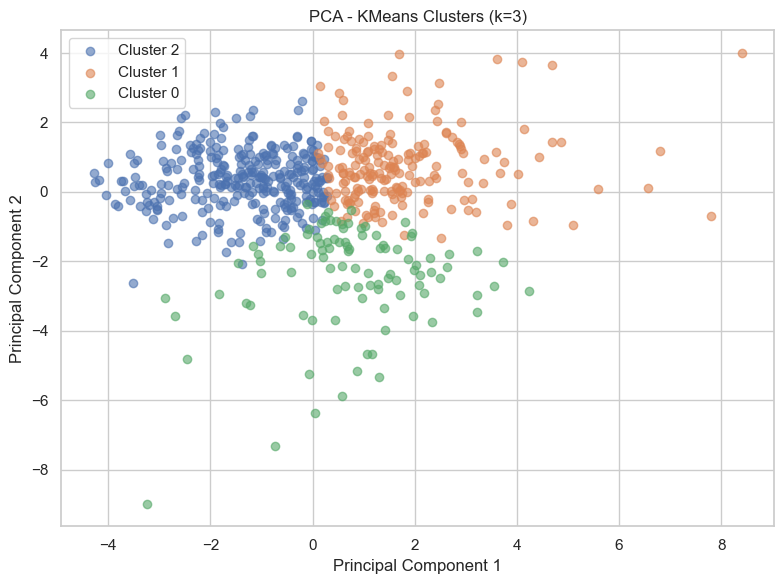

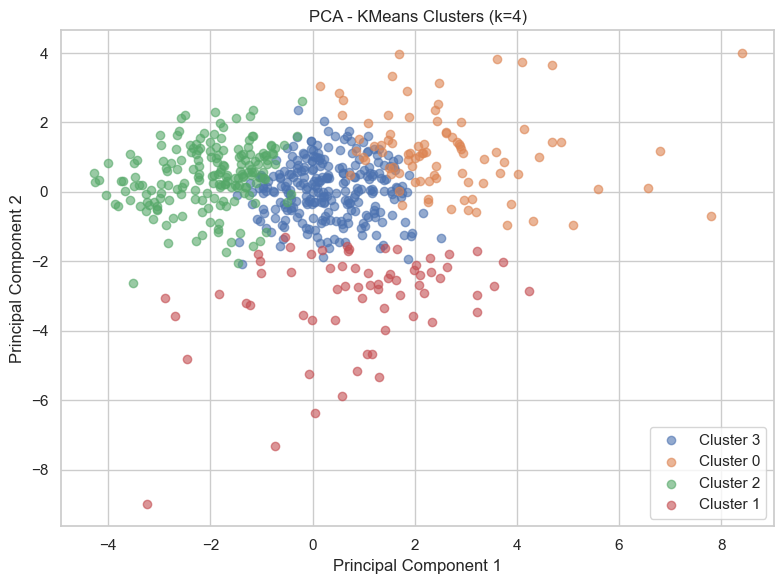

In [12]:

from sklearn.decomposition import PCA

labels_dict = {}

for k in [3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_dict[k] = kmeans.fit_predict(X_scaled)
    
# Run PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create dataframes for plotting
df_pca_k3 = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca_k3["Cluster"] = labels_dict[3]

df_pca_k4 = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca_k4["Cluster"] = labels_dict[4]

# Plot PCA for K=3
plt.figure(figsize=(8, 6))
for cluster in df_pca_k3["Cluster"].unique():
    subset = df_pca_k3[df_pca_k3["Cluster"] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster}", alpha=0.6)
plt.title("PCA - KMeans Clusters (k=3)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot PCA for K=4
plt.figure(figsize=(8, 6))
for cluster in df_pca_k4["Cluster"].unique():
    subset = df_pca_k4[df_pca_k4["Cluster"] == cluster]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"Cluster {cluster}", alpha=0.6)
plt.title("PCA - KMeans Clusters (k=4)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### K = 3 Clusters
- Shows **three fairly distinct groups**, with only some overlap
- Good separation along **PC1 and PC2 axes** (from dimensionality reduction)
- Supports our earlier decision that **k = 3 is a strong choice**

### K = 4 Clusters
- Clusters appear **less distinct**, with noticeable overlap between at least two groups
- Matches the **lower silhouette score**, suggesting that **k = 4 might over-segment** the population


## Labeling the Clusters with Meaningful Names

In [13]:
# Define cluster names for K=3
cluster_names = {
    0: "Heavy Buyers / Variety Seekers",
    1: "Switchers / Promo Shoppers",
    2: "Loyalists"
}

# Recreate the k=3 clustering and apply labels
kmeans_k3 = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster_k3 = df_cluster.copy()
df_cluster_k3["Cluster"] = kmeans_k3.fit_predict(X_scaled)
df_cluster_k3["Segment"] = df_cluster_k3["Cluster"].map(cluster_names)

# Preview the labeled dataset
df_cluster_k3.head()


,No. of Brands,Brand Runs,Switching_Freq,maxBrCd,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %,Total Volume,No. of Trans,Value,Avg. Price,Cluster,Segment
0,3,17,5.666667,0.376947,1.000000,0.000000,0.000000,8025,24,818.0,10.193146,2,Loyalists
1,5,25,5.000000,0.144902,0.887299,0.096601,0.016100,13975,40,1681.5,12.032200,1,Switchers / Promo Shoppers
2,5,37,7.400000,0.545455,0.941558,0.019481,0.038961,23100,63,1950.0,8.441558,1,Switchers / Promo Shoppers
3,2,4,2.000000,0.600000,1.000000,0.000000,0.000000,1500,4,114.0,7.600000,2,Loyalists
4,3,6,2.000000,0.144578,0.614458,0.144578,0.240964,8300,13,591.0,7.120482,0,Heavy Buyers / Variety Seekers


### Cluster Labels & Segment Profiles

Cluster labels have been successfully applied! Here's a summary of the segments:

#### Loyalists
- **Low switching**
- **High brand loyalty (*maxBrCd*)**
- **Barely use promotions**
- Likely stable, brand-loyal households


#### Switchers / Promo Shoppers
- **Low loyalty**
- **High promo usage**
- Tend to switch brands frequently, often influenced by discounts


#### Heavy Buyers / Variety Seekers
- **High purchase volume**
- **Many brands purchased**
- **Low loyalty**
- May enjoy trying new products or purchase for larger/more diverse households


In [14]:
# Save the labeled k=3 clustered dataset to an Excel file
output_path = "Clustered_Households_K3_Labeled.xlsx"
df_cluster_k3.to_excel(output_path, index=False)

output_path


'Clustered_Households_K3_Labeled.xlsx'

## Build a classification model to predict customer segments

### Goal

Train a supervised model (e.g. Random Forest, Logistic Regression, etc.) to predict the **segment label** (*Loyalists*, *Switchers*, etc.) using input features to classify new or unseen households.

### Step-by-Step Plan for Segment Classification

#### 1. Define Target and Features
- **Target:**  
  - *Segment* (Cluster label: Loyalist, Switcher, Variety Seeker)

- **Features:**  
  Include a mix of demographic and behavioral inputs such as:
  - *SEC*, *Affluence Index*, *AGE*, *SEX*, *EDU*
  - *Total Volume*, *Value*, *Avg. Price*
  - *Promo %* variables (*No Promo %*, *Promo 6 %*, *Other Promo %*)
  - Possibly *Switching_Freq*, *No. of Brands*, *Brand Runs*


#### 2. Preprocess
- Encode categorical variables (e.g., *SEX*, *EDU*)
- Normalize / scale features as needed (especially for distance-based models)


#### 3. Split & Train
- Perform **train-test split** (e.g., 80/20)
- Train initial model — start with *RandomForestClassifier*


#### 4. Evaluate
- Use metrics like:
  - **Accuracy**
  - **Classification Report** (Precision, Recall, F1)
- Analyze **Feature Importance** to understand key drivers of segment classification


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Merge cluster labels into the original dataset with household-level demographics
df_classification = df.copy()
df_classification = df_classification.loc[df_cluster_k3.index].copy()
df_classification["Segment"] = df_cluster_k3["Segment"]

# Select features for classification
features = [
    'SEC', 'Affluence Index', 'AGE', 'SEX', 'EDU',
    'Total Volume', 'No. of  Trans', 'Value', 'Avg. Price',
    'Pur Vol No Promo - %', 'Pur Vol Promo 6 %', 'Pur Vol Other Promo %'
]
target = 'Segment'

# Encode categorical columns and target
df_encoded = df_classification[features + [target]].dropna().copy()
le = LabelEncoder()
df_encoded[target] = le.fit_transform(df_encoded[target])  # Converts segment names to 0, 1, 2

# Split into train/test
X = df_encoded[features]
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train.shape, X_test.shape


((480, 12), (120, 12))

- **Features selected**: 12 demographic + behavioral inputs

- **Target**: Encoded customer segment (e.g., Loyalists → 0)

- **Train/Test Split**: 480 training rows, 120 test rows

- **Scaled**: All numeric features standardized


### Random Forest  and Logistic Regression Classifiers

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_preds = rf.predict(X_test_scaled)

# Train Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)

# Evaluate both models
rf_report = classification_report(y_test, rf_preds, output_dict=True)
lr_report = classification_report(y_test, lr_preds, output_dict=True)

# Compare accuracy
rf_accuracy = accuracy_score(y_test, rf_preds)
lr_accuracy = accuracy_score(y_test, lr_preds)

# Prepare a summary comparison table
comparison_df = pd.DataFrame({
    "Model": ["Random Forest", "Logistic Regression"],
    "Accuracy": [rf_accuracy, lr_accuracy],
    "Loyalists F1": [rf_report['0']['f1-score'], lr_report['0']['f1-score']],
    "Switchers F1": [rf_report['1']['f1-score'], lr_report['1']['f1-score']],
    "Variety Seekers F1": [rf_report['2']['f1-score'], lr_report['2']['f1-score']],
})

comparison_df.round(3)


,Model,Accuracy,Loyalists F1,Switchers F1,Variety Seekers F1
0,Random Forest,0.900,0.97,0.914,0.836
1,Logistic Regression,0.883,0.97,0.904,0.787


### Interpretation:

Random Forest wins on overall accuracy and is strong across all segments.

Logistic Regression performs competitively, especially for Variety Seekers, but lags on Loyalists.


In [17]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 5.0 MB/s eta 0:00:30
    --------------------------------------- 2.1/150.0 MB 5.3 MB/s eta 0:00:28
    --------------------------------------- 3.7/150.0 MB 5.7 MB/s eta 0:00:26
   - -------------------------------------- 4.5/150.0 MB 5.5 MB/s eta 0:00:27
   - -------------------------------------- 5.0/150.0 MB 4.9 MB/s eta 0:00:30
   - -------------------------------------- 5.8/150.0 MB 4.5 MB/s eta 0:00:32
   - -------------------------------------- 6.6/150.0 MB 4.4 MB/s eta 0:00:33
   -- ------------------------------------- 7.6/150.0 MB 4.5 MB/s eta 0:00:32
   -- ------------------------------------- 8.4/150.0 MB 4.4 MB/s eta 0:00:33
   -- ------------------------------------- 8.9/150.0 MB 4.3 MB/s eta 0:00:34
   -- ------------------------------------- 9.4/150.0 MB 4.0 MB/s eta 0:00:36
   -- ------------------------------------- 10.0/150.0 MB 3.9 MB/s eta 

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

# Train models
rf = RandomForestClassifier(random_state=42).fit(X_train_scaled, y_train)
lr = LogisticRegression(max_iter=1000, random_state=42).fit(X_train_scaled, y_train)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42).fit(X_train_scaled, y_train)

# Predictions
rf_preds = rf.predict(X_test_scaled)
lr_preds = lr.predict(X_test_scaled)
xgb_preds = xgb.predict(X_test_scaled)

# Evaluate
models = {'Random Forest': rf_preds, 'Logistic Regression': lr_preds, 'XGBoost': xgb_preds}
for name, preds in models.items():
    print(f"\n📊 {name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds, target_names=le.classes_))


D:\Users\sahnoun\anaconda3\envs\P_C_B_env\lib\site-packages\xgboost\training.py:183: UserWarning: [09:45:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📊 Random Forest
Accuracy: 0.9
                                precision    recall  f1-score   support

Heavy Buyers / Variety Seekers       0.94      1.00      0.97        16
                     Loyalists       0.93      0.90      0.91        71
    Switchers / Promo Shoppers       0.82      0.85      0.84        33

                      accuracy                           0.90       120
                     macro avg       0.90      0.92      0.91       120
                  weighted avg       0.90      0.90      0.90       120


📊 Logistic Regression
Accuracy: 0.8833333333333333
                                precision    recall  f1-score   support

Heavy Buyers / Variety Seekers       0.94      1.00      0.97        16
                     Loyalists       0.88      0.93      0.90        71
    Switchers / Promo Shoppers       0.86      0.73      0.79        33

                      accuracy                           0.88       120
                     macro avg       0.89      0

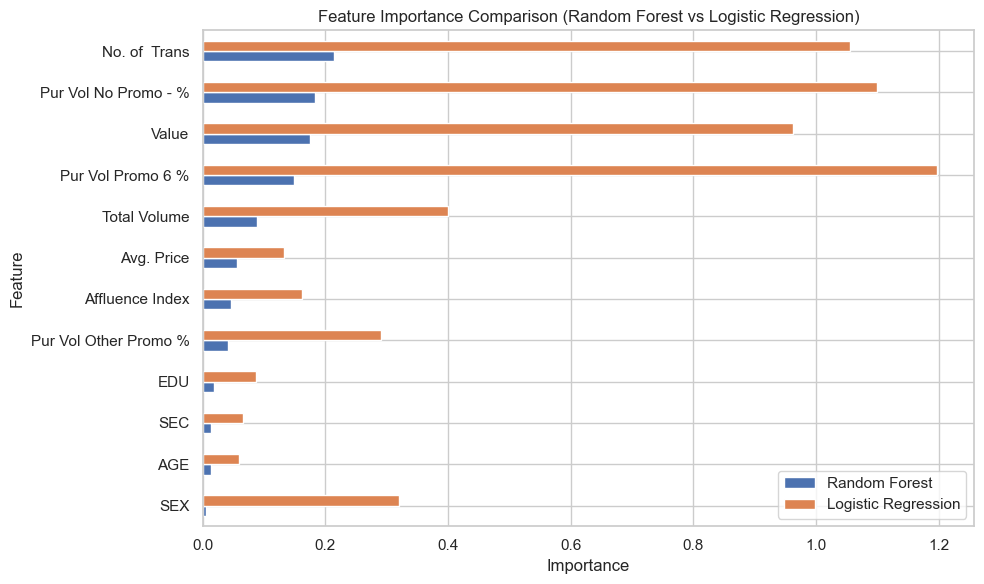

In [19]:
# Generate feature importance for Random Forest and Logistic Regression (coefficients)
import numpy as np

# Feature names
feature_names = X.columns.tolist()

# Random Forest feature importance
rf_importance = rf.feature_importances_

# Logistic Regression absolute coefficient importance
lr_importance = np.abs(lr.coef_).mean(axis=0)

# Create DataFrame for plotting
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Random Forest": rf_importance,
    "Logistic Regression": lr_importance
}).set_index("Feature")

# Plot
importance_df.sort_values("Random Forest", ascending=True).plot.barh(figsize=(10, 6))
plt.title("Feature Importance Comparison (Random Forest vs Logistic Regression)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


## Save the trained models

In [20]:
import joblib

# Save models to files
joblib.dump(rf, "random_forest_segment_model.pkl")
joblib.dump(lr, "logistic_regression_segment_model.pkl")
joblib.dump(scaler, "scaler_for_models.pkl")
joblib.dump(le, "label_encoder_for_segments.pkl")

[
    "random_forest_segment_model.pkl",
    "logistic_regression_segment_model.pkl",
    "scaler_for_models.pkl",
    "label_encoder_for_segments.pkl"
]


['random_forest_segment_model.pkl',
 'logistic_regression_segment_model.pkl',
 'scaler_for_models.pkl',
 'label_encoder_for_segments.pkl']